<a href="https://colab.research.google.com/github/shyamjith94/TimeSeriesDataAnalysis/blob/main/HoltWinterSimple%26Double%26TripleExpSmoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
data = pd.read_csv("/content/drive/My Drive/TimeSeriesDataAnalysis/Data/airline_passengers.csv", index_col="Month", parse_dates=True)
data.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [5]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

**HOTWINTER method need to identify the datetime freg(daily, month, yeary)**

In [7]:
data.index.freq = 'MS' # monthly start
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [8]:
data.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# SimpleExponentialSmoothing

**Calculate exponentional moving average(ewm) using pandas ewm**

In [11]:
span = 12 # 12 month
alpha = 2/(span+1)

In [12]:
data['EWMA12'] = data['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()
data.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


**Calculate exponentional moving average(ewm) using SimpleExpSmoothing**

In [13]:
model = SimpleExpSmoothing(data['Thousands of Passengers'])

In [14]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [15]:
fitted_model.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
                 ...    
1960-08-01    474.698368
1960-09-01    494.898619
1960-10-01    496.914216
1960-11-01    491.388952
1960-12-01    475.790652
Freq: MS, Length: 144, dtype: float64

In [16]:
fitted_model.fittedvalues.shift(-1)

Month
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
                 ...    
1960-08-01    494.898619
1960-09-01    496.914216
1960-10-01    491.388952
1960-11-01    475.790652
1960-12-01           NaN
Freq: MS, Length: 144, dtype: float64

In [17]:
data['SES12'] = fitted_model.fittedvalues.shift(-1)

In [18]:
data.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


# DoubleExponentialSmoothing

**double exponential smoothing addictive model**

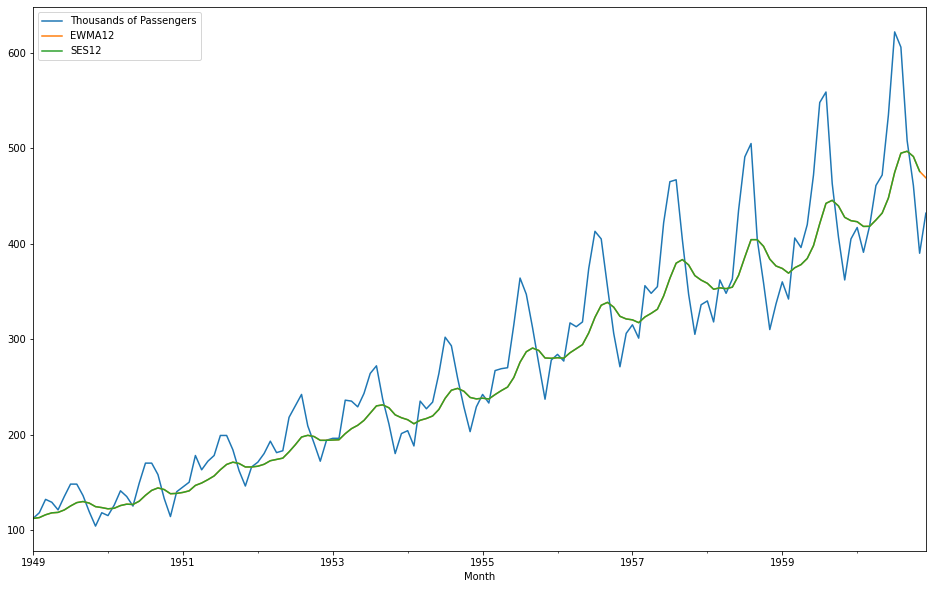

In [21]:
data.plot(figsize=(16,10))

In [23]:
data['DES_ADD_12'] = ExponentialSmoothing(data['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
data.head()

,Thousands of Passengers,EWMA12,SES12,DES_ADD_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.336233
1949-02-01,118,112.923077,112.923077,120.336233
1949-03-01,132,115.857988,115.857988,134.336233
1949-04-01,129,117.879836,117.879836,131.336233
1949-05-01,121,118.359861,118.359861,123.336233


In [25]:
data.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_ADD_12'], dtype='object')

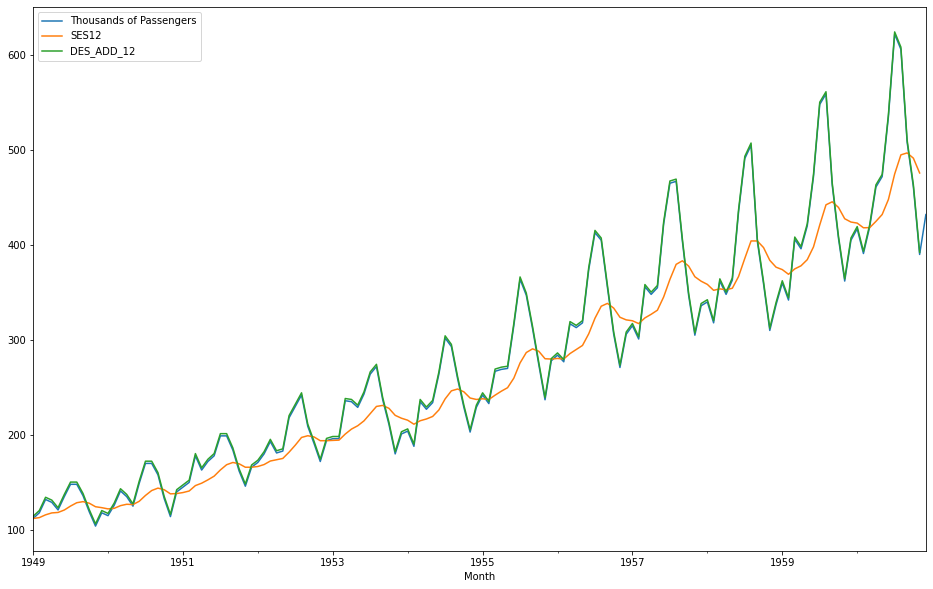

In [26]:
data[['Thousands of Passengers', 'SES12', 'DES_ADD_12']].plot(figsize=(16,10))

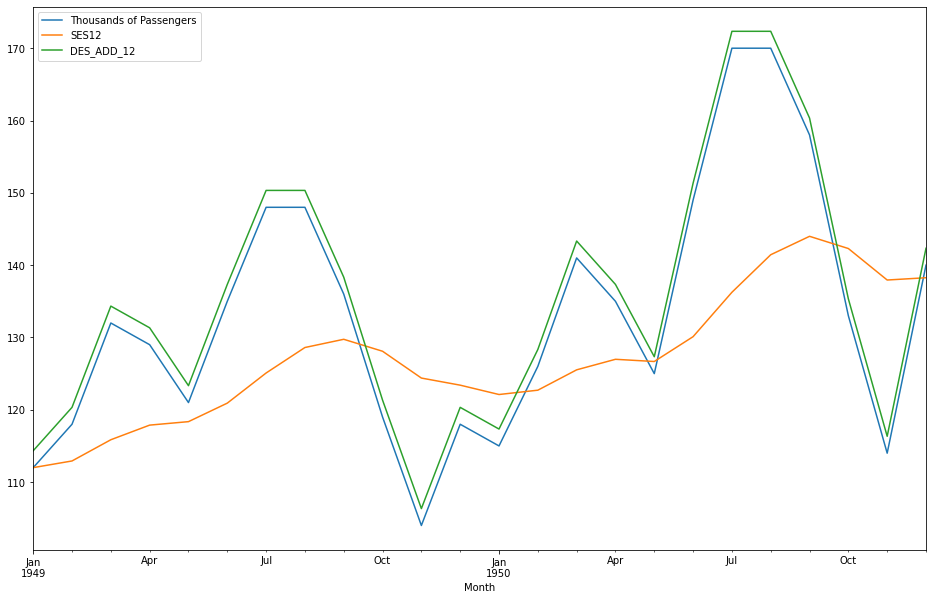

In [27]:
data[['Thousands of Passengers', 'SES12', 'DES_ADD_12']].iloc[:24].plot(figsize=(16,10))

**Checking multiplicative model**

In [28]:
data['DES_MUL_12'] = ExponentialSmoothing(data['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
data.head()

,Thousands of Passengers,EWMA12,SES12,DES_ADD_12,DES_MUL_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.336233,112.049247
1949-02-01,118,112.923077,112.923077,120.336233,118.051885
1949-03-01,132,115.857988,115.857988,134.336233,132.058041
1949-04-01,129,117.879836,117.879836,131.336233,129.056722
1949-05-01,121,118.359861,118.359861,123.336233,121.053204


In [29]:
data.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_ADD_12',
       'DES_MUL_12'],
      dtype='object')

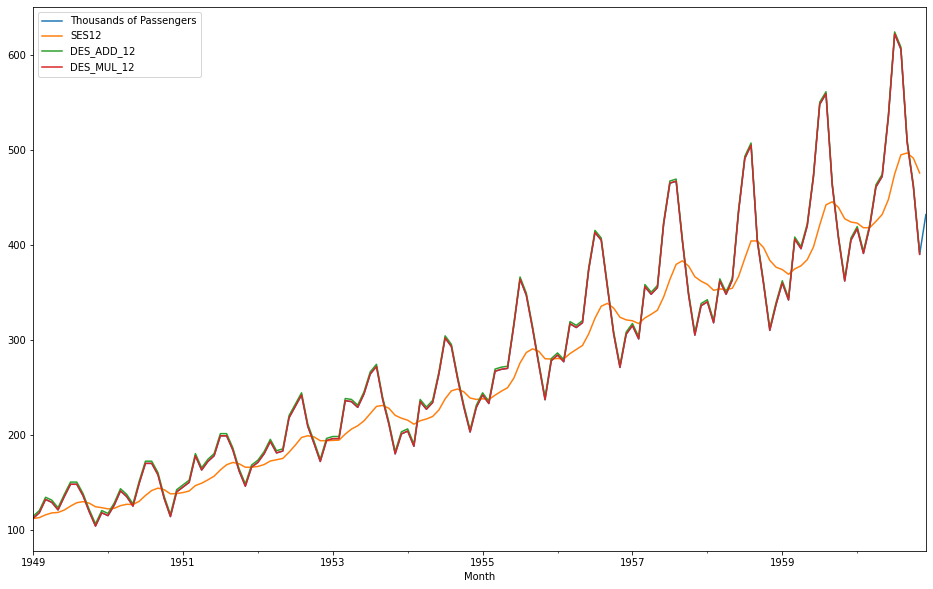

In [30]:
data[['Thousands of Passengers', 'SES12', 'DES_ADD_12', 'DES_MUL_12']].plot(figsize=(16,10))

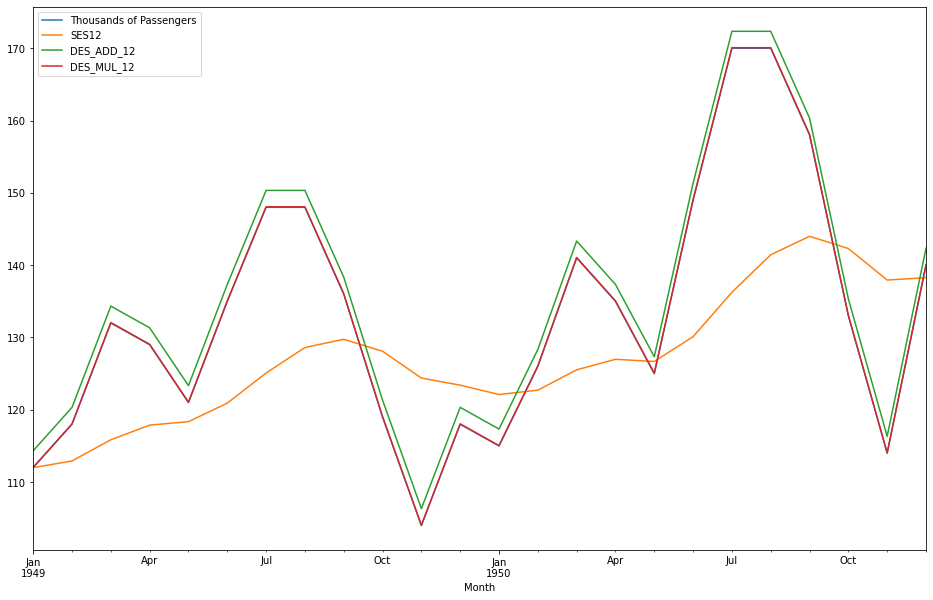

In [31]:
data[['Thousands of Passengers', 'SES12', 'DES_ADD_12', 'DES_MUL_12']].iloc[:24].plot(figsize=(16,10))

# TripleExponentialSmoothing

In [33]:
data['TES_MUL_12'] = ExponentialSmoothing(data['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

In [34]:
data.head()

,Thousands of Passengers,EWMA12,SES12,DES_ADD_12,DES_MUL_12,TES_MUL_12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.336233,112.049247,111.583236
1949-02-01,118,112.923077,112.923077,120.336233,118.051885,118.839294
1949-03-01,132,115.857988,115.857988,134.336233,132.058041,133.327416
1949-04-01,129,117.879836,117.879836,131.336233,129.056722,127.915388
1949-05-01,121,118.359861,118.359861,123.336233,121.053204,120.978320


In [35]:
data.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_ADD_12',
       'DES_MUL_12', 'TES_MUL_12'],
      dtype='object')

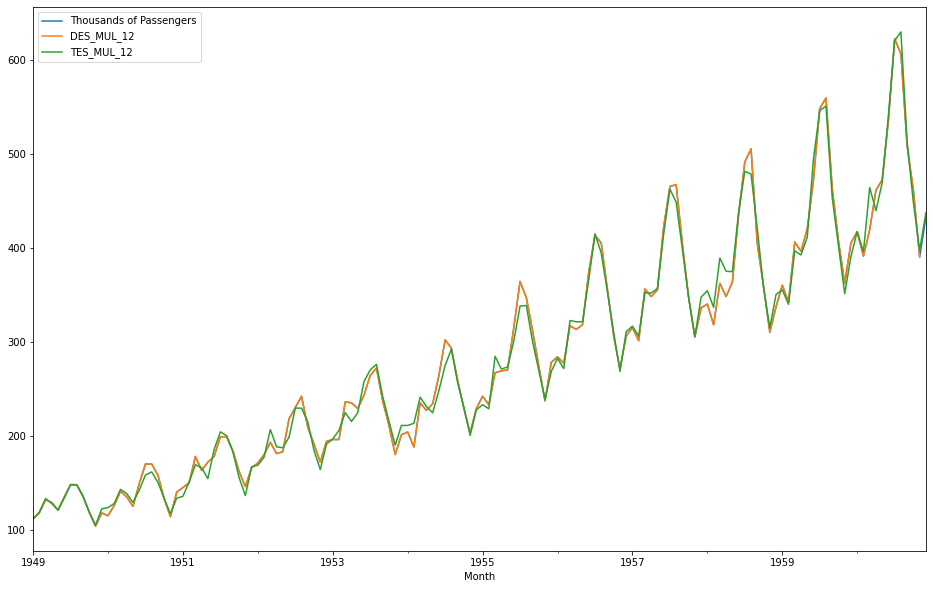

In [37]:
data[['Thousands of Passengers','DES_MUL_12', 'TES_MUL_12']].plot(figsize=(16,10))

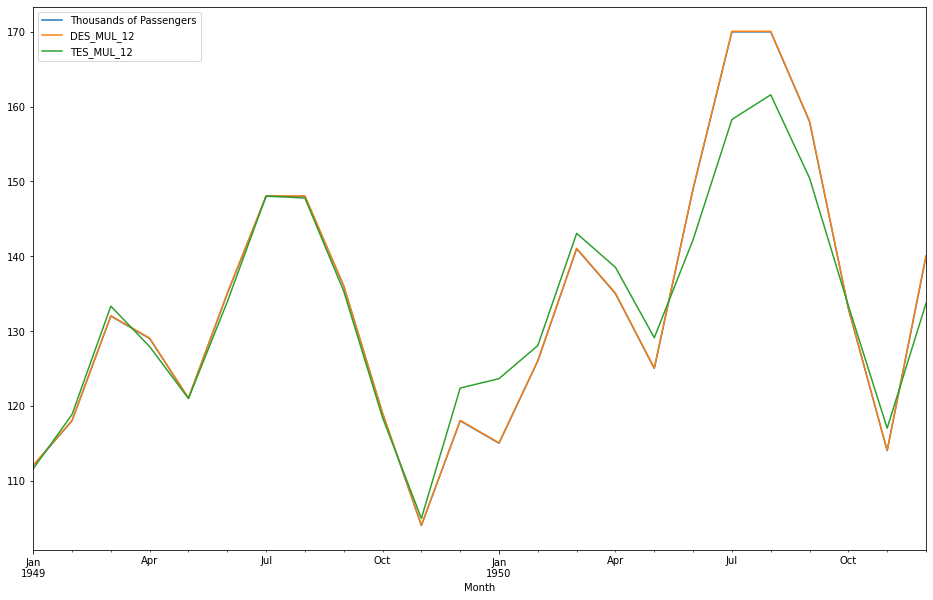

In [38]:
data[['Thousands of Passengers','DES_MUL_12', 'TES_MUL_12']].iloc[:24].plot(figsize=(16,10))

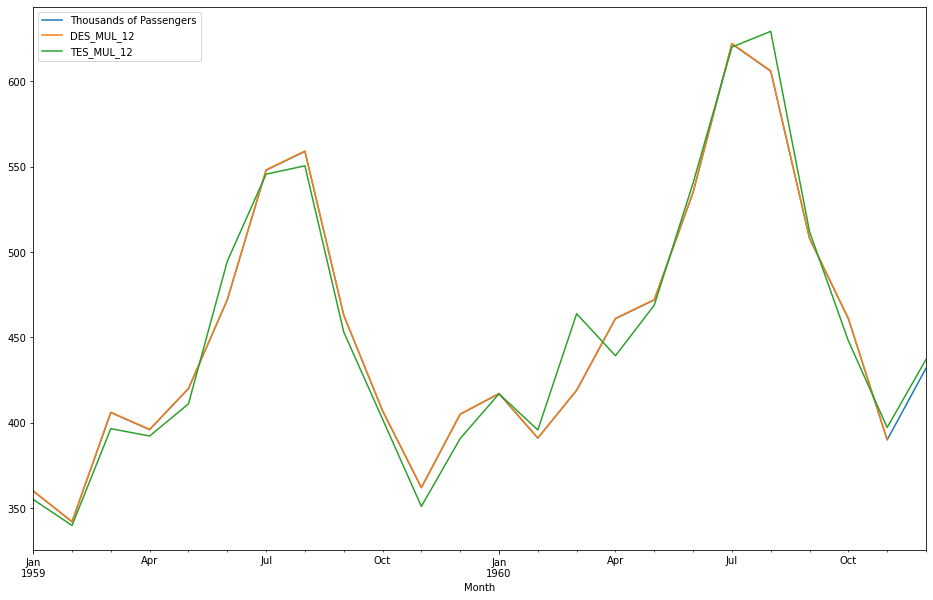

In [40]:
data[['Thousands of Passengers','DES_MUL_12', 'TES_MUL_12']].iloc[-24:].plot(figsize=(16,10))

In [41]:
# Double exponential model fiting data well